# 1. Linear Regression

In [1]:
#import tensorflow as tf
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

### a) 데이터 만들기

In [2]:
data = {'x':[13,19,16,14,15,14],
       'y': [40,83,62,48,58,43]}
data = pd.DataFrame(data)
print(data)

    x   y
0  13  40
1  19  83
2  16  62
3  14  48
4  15  58
5  14  43


### b) Scatter plot (산점도)

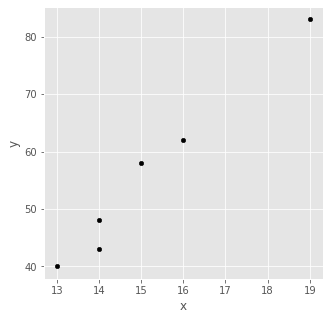

In [3]:
data.plot(kind='scatter',x='x',y='y', figsize=(5,5), color='black')

pyplot을 이용하는 방법

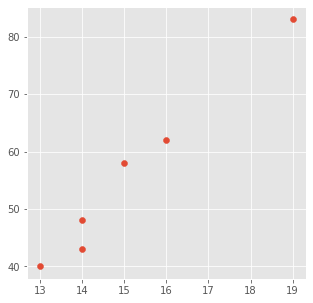

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(data['x'],data['y'] )

### c) 데이터 학습시키기 (Training)

In [5]:
linear_regression = linear_model.LinearRegression()

# 학습을 위해선 X 값은 2차원 형태, y갑은 기존 형태로 입력해야함
linear_regression.fit( X = pd.DataFrame(data['x']), y=data['y'] )
prediction = linear_regression.predict(X=pd.DataFrame(data['x']))
print( 'a value = ', linear_regression.intercept_ )
print( 'b value = ', linear_regression.coef_ )

a value =  -55.48175182481753
b value =  [7.32846715]


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data['x']

0    13
1    19
2    16
3    14
4    15
5    14
Name: x, dtype: int64

In [8]:
pd.Series(data['x'])

0    13
1    19
2    16
3    14
4    15
5    14
Name: x, dtype: int64

### d) 적합도 검증

In [9]:
residuals = data['y'] - prediction
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

**Sum of Squares Error (SSE)**: 예측치와 실제 값 차이의 제곱의 합, 설명된 편차  
**Sum of Squares Regression (SSR)**: 예측치와 실제 값 $y_i$들의 평균 $\bar{y}$ 차이의 제곱의 합  
**Sum of Squares Total (SST)**: SSR + SSE, 실제 값 $y_i$들이 이들의 평균 평균 $\bar{y}$ 로부터 흩어진 정도  

**결정계수 ($R^2$)**: $\frac{SSR}{SST}$ = $1 - \frac{SSE}{SST}$ , 0~1 사이의 값

In [10]:
# Explained Sum of errors (Sum of Squares error)
SSE = (residuals**2).sum()

# SST
SST = (( data['y'] - data['y'].mean() )**2).sum()

R_sq = 1 - (SSE/SST)
print('R_squared = ', R_sq)

R_squared =  0.9753156179610034


In [13]:
from sklearn.metrics import mean_squared_error

print('score= ', linear_regression.score(X=pd.DataFrame(data['x']), y=data['y'] ))
print('MSE= ', mean_squared_error( prediction ,data['y'] ))
print('RMSE= ', mean_squared_error( prediction ,data['y'] )**.5 )

score=  0.9753156179610034
MSE=  5.172749391727503
RMSE=  2.2743679103714736


# Boston House Prices

In [22]:
from sklearn import datasets

boston_house_price = datasets.load_boston()
boston_house_price.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [23]:
print(boston_house_price.data.shape) # data의 shape
print(boston_house_price.feature_names) # Feature 이름들
print(boston_house_price.DESCR) # Dataset characteristics

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to 

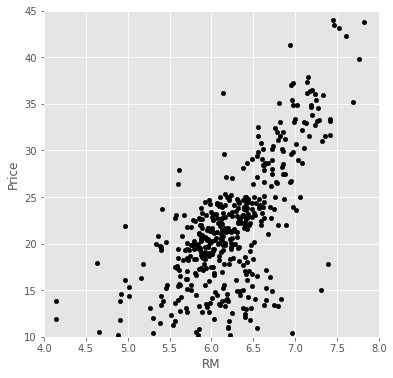

In [29]:
# DataFrame화
df =pd.DataFrame(boston_house_price.data)

# df의 column들에게 이름을 지어주자
df.columns = boston_house_price.feature_names

# target이라는 실제 정답치를 df의 Price column에 넣음
df['Price'] = boston_house_price.target

df.plot(kind='scatter', x='RM', y='Price', figsize=(6,6), color='black', xlim=(4,8), ylim=(10,45))

In [32]:
lr = linear_model.LinearRegression()
lr.fit( X = pd.DataFrame(df['RM']), y=df['Price'])
prediction = lr.predict( X = pd.DataFrame(df['RM']))

print ('a = ', lr.intercept_)
print( 'b= ', lr.coef_)

residuals = df['Price'] - prediction
residuals.describe()

a =  -34.67062077643857
b=  [9.10210898]


count    5.060000e+02
mean     2.134437e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

### Multivariable linear regression

In [43]:
df.loc[:, df.columns != 'Price']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [42]:
mlr = linear_model.LinearRegression()
x_house = df.loc[:, df.columns != 'Price']
mlr.fit( x_house , df['Price']  )
prediction = mlr.predict( X = x_house )
print( 'a (intercept) : ', mlr.intercept_ )
print( 'b (weights): ', mlr.coef_)

a (intercept) :  36.45948838508978
b (weights):  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [46]:
residuals = df['Price'] - prediction
residuals.describe()
SSE = (residuals**2).sum()
SST = ((df['Price'] - df['Price'].mean() ) **2).sum()
R_sq = 1-(SSE/SST)
print('R_squared: ', R_sq)

R_squared:  0.7406426641094095


# 기계학습 실습

## Decision Tree

In [11]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, mean_squared_error

In [14]:
data = datasets.load_breast_cancer()
X= data.data # data & features
y= data.target # class

`train_test_split`을 이용하여 train set, test set 분리 후 test size를 전체의 20%로

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )

**Decision Tree** 분류 모델 생성 이후 `fit` 이후 `predict` 해서 score 보기

In [16]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[38  3]
 [10 63]]


Y_test, y_pred를 비교하여 accuracy 출력
*normalize*: false일 시 올바르게 분류된 건수 출력. True 일 시 비율을 출력

In [18]:
print('Accuracy')
print(accuracy_score(y_test, y_pred, normalize = True))

Accuracy
0.8859649122807017


In [19]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        41
           1       0.95      0.86      0.91        73

    accuracy                           0.89       114
   macro avg       0.87      0.89      0.88       114
weighted avg       0.90      0.89      0.89       114



In [20]:
print('AUC')
print(roc_auc_score(y_test, y_pred))

AUC
0.89492148346141


In [21]:
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.11403508771929824


### K-fold Cross-validation 이용한 기계학습 모델 성능평가

In [22]:
# 데이터셋 구성

skf = StratifiedKFold(n_splits = 10)
skf.get_n_splits(X,y)

# 10번의 실험을 위한 데이터 셋 구성 살펴보기
"""
for train_index, test_index in skf.split(X,y):
    print("Train Set: ", train_index)
    print("Test Set: ", test_index)
"""

clf = DecisionTreeClassifier()

# k fold cross validation score를 구하는 과정
scores = cross_val_score(clf, X, y, cv=skf)
print("average accuracy: ", scores.mean())

# Shuffle
skf_sh = StratifiedKFold(n_splits = 10, shuffle=True)
skf_sh.get_n_splits(X,y)

scores = cross_val_score(clf, X, y, cv=skf_sh)
print("average accuracy (shuffle): ", scores.mean())

average accuracy:  0.9159320715582059
average accuracy (shuffle):  0.9226384927836833


# 선형회귀분석
## 1. 단일선형회귀분석